# Multi layer Perceptron Application - Real world example: Binary classification

Previously, I tested the Multi Layer Perceptron model I built from scratch on dummy values using numpy to generate some random x and corresponding y. Pretty much learned the underlying patterns of the data, but overshoot. But that's okay. Overshooting is a good thing because it indicates the model is learning, albeit it's over learning 😂. We address the over learning problem by introducing some ***regularization*** or ***optimization*** technique (or both) to get the model to take some small steps back on the learning and only learn necessary patterns. We do this by adding constraints on the cost function (regularization) or optimally adjusting the models parameters (weights and bias) to minimize the cost function (optimization).

But that's for a later notebook. In this notebook, I test my model on a real world dataset cats vs dogs classification. Hopefully it goes well. Should still overfit, but we'll work on that in the coming notebooks.

Here we go!

Dataset used: cats vs dogs dataset from [Kaggle](https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset/data)

Unzipped and copied the ***"PetImages"*** folder to working directory. Changed the name to ***"dataset"***.

In [152]:
# importing libraries
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import cv2
import pathlib
from PIL import Image
from scipy import ndimage
from utils import * 
from deep_nn import *


%matplotlib inline
# plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# fetching our dataset path
database_dir = pathlib.Path("./dataset")

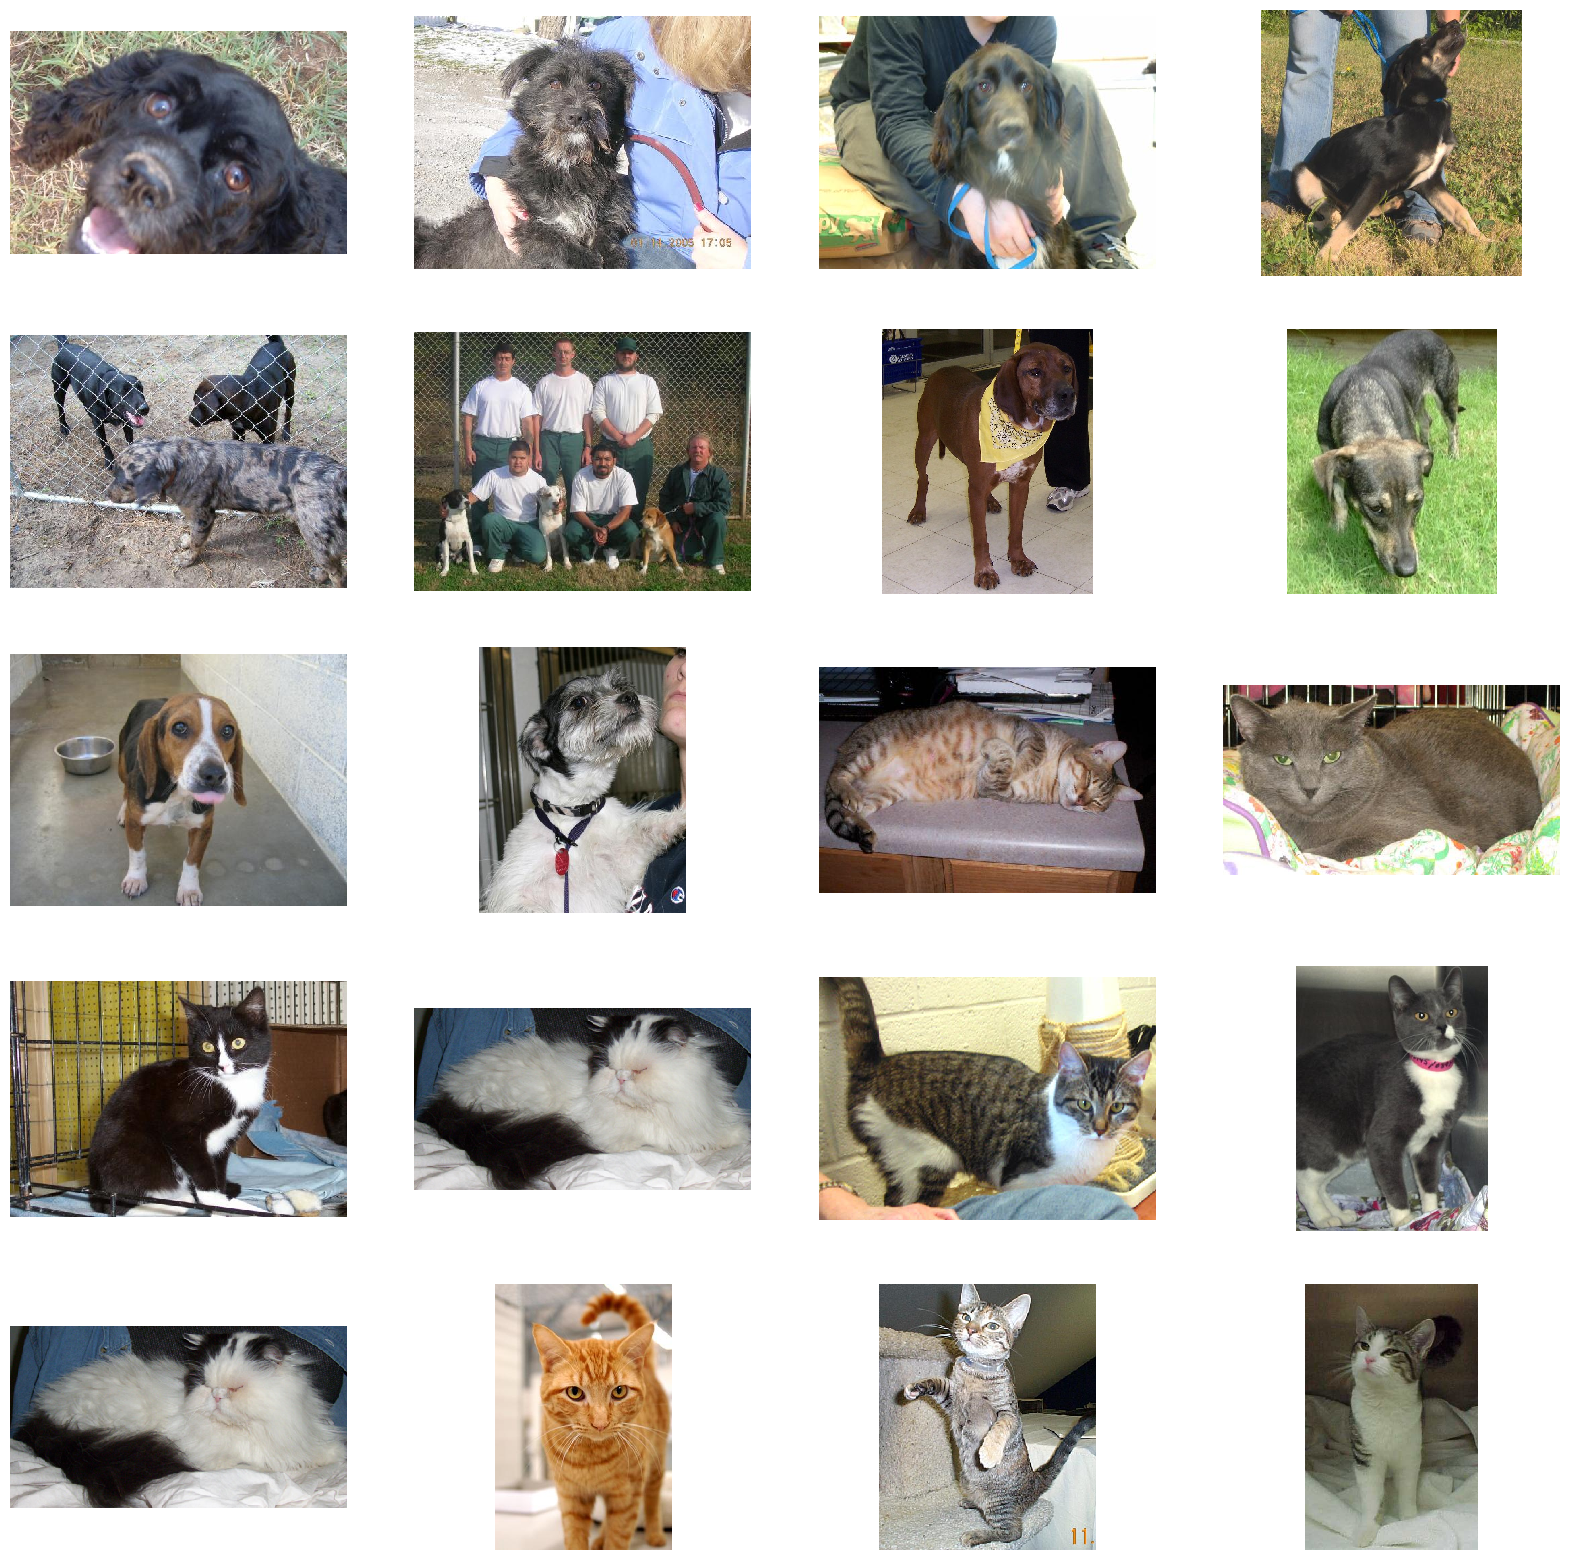

In [3]:
# Visualizing dataset

cat = list(database_dir.glob('cat/*'))
dog = list(database_dir.glob('dog/*'))

plt.figure(figsize=(20, 20))
random_paths = random.choices(dog, k=10)
random_paths.extend(random.choices(cat, k=10))
len(random_paths)

for idx, val in enumerate(random_paths):
    img = cv2.imread(val)
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, idx+1); plt.imshow(img_rgb); plt.axis('off')
    
    

In [153]:
print(f"cats samples: {len(cat)} dog samples: {len(dog)}")

cats samples: 12490 dog samples: 12469


In [9]:
# Getting our dataset. 12k samples is way to much for this test atm.
images_dict = {
    'cat':cat[:209],
    'dog':dog[:209]
}

# Checking if it worked
images_dict['cat'][0]

WindowsPath('dataset/cat/0.jpg')

In [10]:
# Encoding our class names to binary
labels_dict = {
    'cat':0,
    'dog':1
}

In [157]:
# Creating our X and y dataset from the images
X, y = [], []
img_size = (224, 224)
for name, images in images_dict.items():
    for image in images:
        img = cv2.imread(image)
        if img is not None:
            resize_img = cv2.resize(img, img_size)
            X.append(resize_img)
            y.append(labels_dict[name])


In [158]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(416, 224, 224, 3) (416,)


Preparing our data to fit our model architecture<br>
desired X.shape: $((w*h*d), m)$ = $((224*224*3), 416)$<br><br>
desired y.shape: $(1, m)$ = $(1, 416)$<br>

In [159]:
X = X.T
X = X.reshape(X.shape[1], X.shape[2], X.shape[0], X.shape[3])
X_flatten = image2Vector(X)

In [163]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 416)

In [164]:
print(F"X_shape: {X_flatten.shape}, y_shape: {y.shape}")

X_shape: (150528, 416), y_shape: (1, 416)


In [165]:
X_train, y_train, X_test, y_test = train_test_split(X_flatten, y, 0.2, random_state=1)

In [166]:
X_train = X_train/255
X_test = X_test/255

In [168]:
np.max(X_train)

np.float64(1.0)

Training the data

In [52]:
hidden_layers = [20, 10]
layer_dims = [X_train.shape[0], *hidden_layers, y.shape[0]]
print(layer_dims)

parameters, costs, accuracies, lr = neural_net(X_train, y_train, layer_dims, learning_rate=0.01, print_cost=True)

[150528, 20, 10, 1]
*****************************************************
iteration 1: loss: 2.0972539864032593, accuracy: 0.503012048192771

*****************************************************
iteration 101: loss: 0.6488117789427957, accuracy: 0.641566265060241

*****************************************************
iteration 201: loss: 0.6252971157448499, accuracy: 0.680722891566265

*****************************************************
iteration 301: loss: 0.5998065584497564, accuracy: 0.7259036144578312

*****************************************************
iteration 401: loss: 0.573125801730237, accuracy: 0.75

*****************************************************
iteration 501: loss: 0.5452584104409757, accuracy: 0.7740963855421686

*****************************************************
iteration 601: loss: 0.5157580535121045, accuracy: 0.7981927710843373

*****************************************************
iteration 701: loss: 0.48403003424291857, accuracy: 0.8192771084337349


Getting insights on the model behavior, accuracy and loss

In [59]:
predictions, train_accuracy = predict(X_train, y_train, params=parameters)
predictions, test_accuracy = predict(X_test, y_test, parameters)

In [63]:
overfit_dif = 0.2
if train_accuracy < 0.8:
    model_behavior = "underfitting"
elif test_accuracy >= (train_accuracy - overfit_dif):
    model_behavior ="just_right"
else:
    model_behavior= "overfitting"   

print(f"model is {model_behavior}.\ntrain_acc: {train_accuracy}\ntest_acc: {test_accuracy}")


model is overfitting.
train_acc: 0.969879518072289
test_acc: 0.5119047619047619


Right. But we already knew our model was going to overfit.

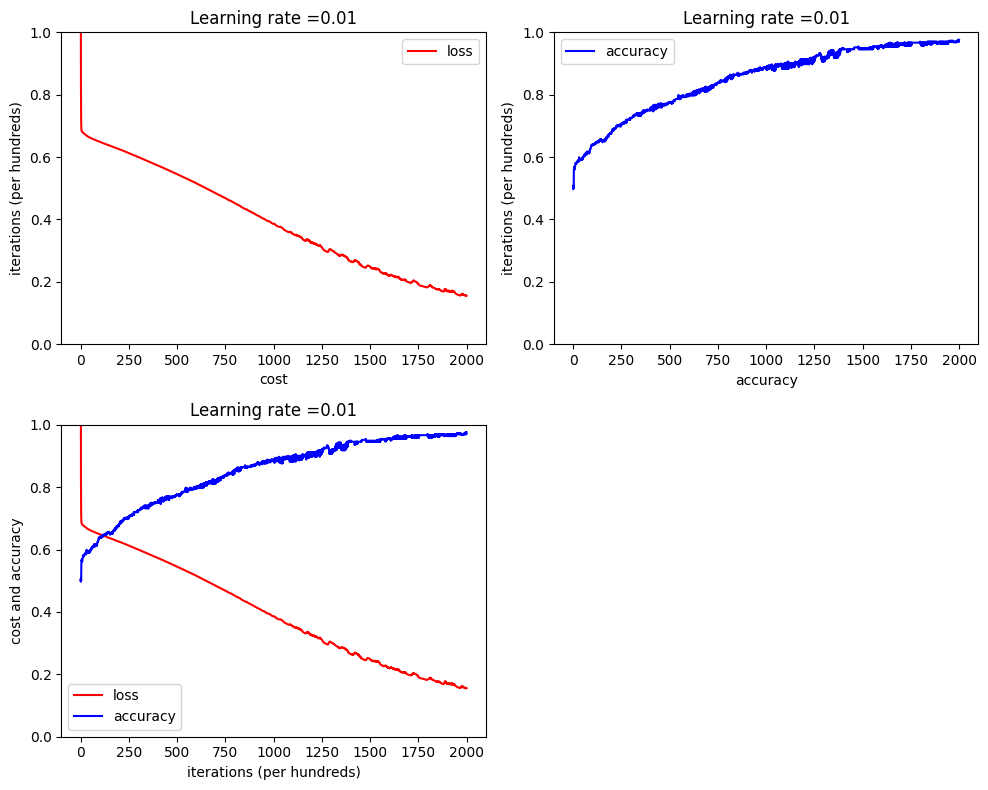

In [64]:
plot_history(costs=costs, accuracies=accuracies, lr=lr)

Predicting for a single value

take in X, output y using model params

In [169]:
def predict_y(x, params):
    p, _ = forward_pass(x, params)
    if p > 0.5:
        return 1
    return 0

Single example prediction

In [148]:
X_train_i = X_train[:, -1]
X_train_i = np.expand_dims(X_train_i, axis=1)
X_train_i.shape

(150528, 1)

In [149]:
p = predict_y(X_train_i, parameters)
p

1

In [143]:
y_test_i = np.expand_dims(y_train[:, -1], axis=1)
y_test_i

array([[1]])

Phew! So it did well on the real world example. Next is getting rid of the overfitting. Regularization and Optimization coming soon...